In [296]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# A Notch Digital Filter (6 marks, 3/2/1)

collaborators: none

## part 1
The poles of this system are when we have the denominator go to 0. To get that, we must have $z=p=(1+\epsilon)q$ and $z=p^*=(1+\epsilon)q^*$. The zeros are when the numerator = 0. Here we would need $z=q=e^{-i2\pi f_0/f_s}$ and $z=q*=e^{i2\pi f_0/f_s}$. The zeros are located on the unit circle. However, since $\epsilon$ is positive, the poles are outside of the unit circle. Yes the system is stable. To find if the filter is real, we take a real valued number z, such that $-z=z^*$ and check $W^*(z) = M \frac{-z-q^*}{-z-p^*} \frac{-z-q}{-z-p} = W(-z)$. So yes, the filter is real.


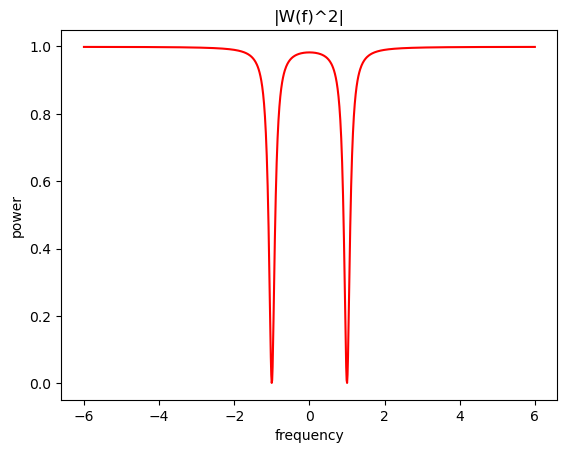

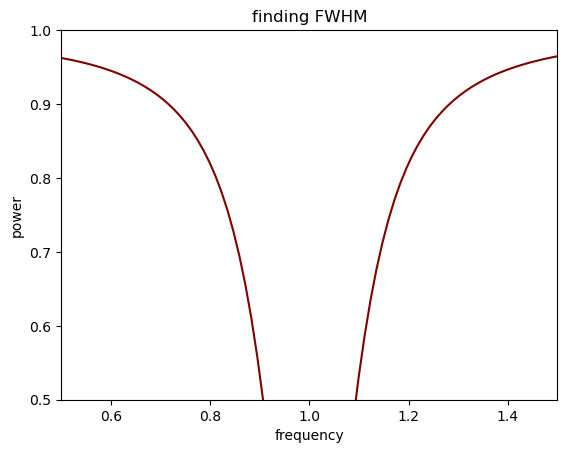

In [299]:
import matplotlib.pyplot as plt
import numpy as np
 
## part 2

fs = 12
delta = 1.0/fs
f0 = 1
M=1.05
eps=0.05

q = np.exp(-1j*2*np.pi*f0/fs)
p = (1+eps)*q
def W(f):
    z = np.exp(-1j*2*np.pi*f*delta)
    qc=np.conj(q)
    pc=np.conj(p)
    w = M * ((z-q)/(z-p))*((z-qc)/(z-pc))
    return w

f = np.linspace(-fs/2,fs/2,1000)
wf = W(f)

plt.figure()
plt.plot(f,wf*np.conj(wf), 'red')
plt.title('|W(f)^2|')
plt.xlabel('frequency')
plt.ylabel('power')
plt.figure()
plt.plot(f,wf*np.conj(wf), 'maroon')
plt.title('finding FWHM')
plt.xlabel('frequency')
plt.ylabel('power')
plt.ylim(0.5,1)
plt.xlim(0.5,1.5)
wf2 = wf*np.conj(wf)

## part 3

To make the notch sharper, we need to change the value of $\epsilon$ and make it smaller. This decreases the value of $f_{fwhm}$ because its determined by $2*\epsilon$. Based on the plot, I zoomed in to where yaxis starts at 0.5 and found the FWHM to be 0.2.

# Implementing the Notch Filter (6 marks, 2/2/1/1)

## q2 part 1
collaborators: none

We expand the function in question 1 to get -> $M \frac{z^2 - 2zRe(q) + |q|^2}{z^2 - 2zRe(p) + |p|^2}$. We are looking to make this function similar to W(z) defined above $W(z) = \frac{a+bz+cz^2}{1+Bz+Cz^2}$. To do this, we divide the expansion we just did by $|p|^2$ to get $M \frac{z^2/|p|^2 - 2zRe(q)/|p|^2 + |q|^2/|p|^2}{z^2/|p|^2 - 2zRe(p)/|p|^2 + 1}$. Now we can easily tell what the values of a,b,c,B and C are.

$a = M \frac{|q|^2}{|p|^2} = 0.95$
$b = -2M \frac{Re(q)}{|p|^2} = -1.65$
$c = \frac{M}{|p|^2} = 0.95$
$B = \frac{-2Re(p)}{|p|^2} = -1.65$
$C = \frac{1}{|p|^2} = 0.91$

In [300]:
a = np.real((M*q*np.conj(q))/(p*np.conj(p)))
b = np.real(-2*M*np.real(q)/(p*np.conj(p)))
c = np.real(M/(p*np.conj(p)))
B = np.real(-2*np.real(p)/(p*np.conj(p)))
C = np.real(1/(p*np.conj(p)))
print('a is', a, 'b is', b, 'c is', c, 'B is', B, 'C is', C)


a is 0.9523809523809523 b is -1.649572197684645 c is 0.9523809523809523 B is -1.649572197684645 C is 0.9070294784580498


In [301]:
#part 2

N = [a,b,c]
D = [1,B,C]

def ratfilter(N,D,x):
    numer = np.convolve(N,x)[:-2] #index is out of range otherwise
    y = np.zeros(len(x))
    y[0] = numer[0]
    
    for i in range(len(x)):
        xx = []
        for k in range(1,len(D)):
            if i-k >= 0:
                xx.append(D[k]*y[i-k])
        y[i] = numer[i] - np.sum(xx) #i dont divide by a_0 because a_0 = 1 in this question
    return y


Text(0.5, 1.0, 'Impulse Response of notch filter W(z) from 0 to 6 years')

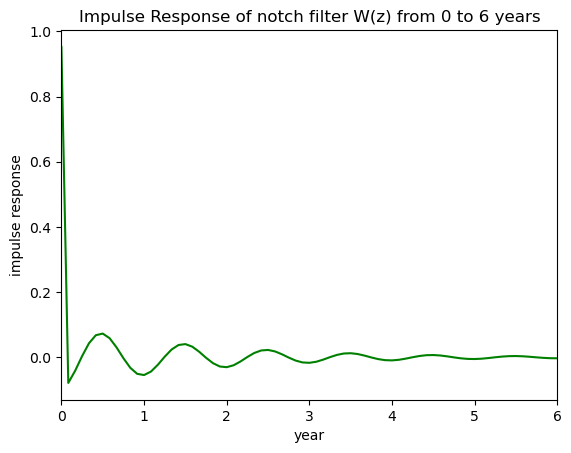

In [302]:
##part 3
dt = 1/fs
t = np.arange(0,100,dt)
delta = np.zeros(len(t))
delta[0]= 1

imp = ratfilter(N,D,delta)
plt.plot(t,imp, 'green')
plt.xlim(0,6)
plt.xlabel('year')
plt.ylabel('impulse response')
plt.title('Impulse Response of notch filter W(z) from 0 to 6 years')

If we halve the FWHM value, the impulse response rate would increase in frequency and we would see twice the amount of oscillations than we do right now.

Text(0, 0.5, 'frequency response')

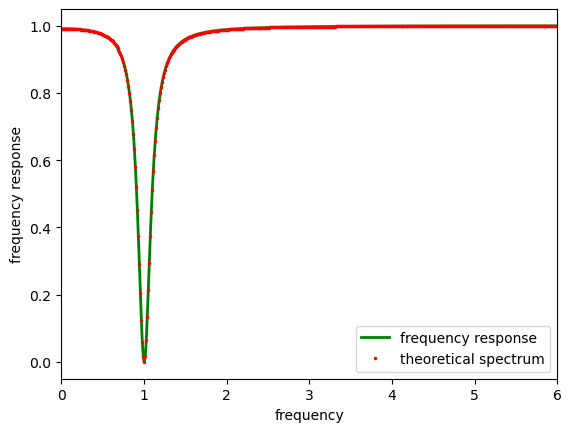

In [304]:
## part 4

impfft = np.fft.fftshift(np.fft.fft(imp)*dt)*fs
impfreq = np.fft.fftshift(np.fft.fftfreq(len(impfft),dt))

plt.plot(impfreq,impfft, 'green', lw = 2, label = 'frequency response')
plt.plot(f,wf, 'ro', markersize = 1.5, label = 'theoretical spectrum')
plt.xlim(0,6)
plt.legend()
plt.xlabel('frequency')
plt.ylabel('frequency response')


In [305]:
# %load co2data.py
import numpy as np
  
co2Values = np.array([    
    [319.44, 320.44, 320.89, 322.14, 322.17, 321.87, 321.21, 318.87, 317.81, 317.30, 318.87, 319.42],
    [320.62, 321.60, 322.39, 323.70, 324.08, 323.75, 322.38, 320.36, 318.64, 318.10, 319.78, 321.03],
    [322.33, 322.50, 323.04, 324.42, 325.00, 324.09, 322.54, 320.92, 319.25, 319.39, 320.73, 321.96],
    [322.57, 323.15, 323.89, 325.02, 325.57, 325.36, 324.14, 322.11, 320.33, 320.25, 321.32, 322.89],
    [324.00, 324.42, 325.63, 326.66, 327.38, 326.71, 325.88, 323.66, 322.38, 321.78, 322.86, 324.12],
    [325.06, 325.98, 326.93, 328.13, 328.08, 327.67, 326.34, 324.69, 323.10, 323.06, 324.01, 325.13],
    [326.17, 326.68, 327.17, 327.79, 328.93, 328.57, 327.36, 325.43, 323.36, 323.56, 324.80, 326.01],
    [326.77, 327.63, 327.75, 329.72, 330.07, 329.09, 328.04, 326.32, 324.84, 325.20, 326.50, 327.55],
    [328.55, 329.56, 330.30, 331.50, 332.48, 332.07, 330.87, 329.31, 327.51, 327.18, 328.16, 328.64],
    [329.35, 330.71, 331.48, 332.65, 333.19, 332.20, 331.07, 329.15, 327.33, 327.28, 328.31, 329.58],
    [330.73, 331.46, 331.94, 333.11, 333.95, 333.42, 331.97, 329.95, 328.50, 328.36, 329.38, 330.62],
    [331.56, 332.74, 333.36, 334.74, 334.72, 333.98, 333.08, 330.68, 328.96, 328.72, 330.16, 331.62],
    [332.68, 333.17, 334.96, 336.14, 336.93, 336.17, 334.88, 332.56, 331.29, 331.28, 332.46, 333.60],
    [334.94, 335.26, 336.66, 337.69, 338.02, 338.01, 336.50, 334.42, 332.36, 332.45, 333.76, 334.91],
    [336.14, 336.69, 338.27, 338.82, 339.24, 339.26, 337.54, 335.72, 333.97, 334.24, 335.32, 336.82],
    [337.90, 338.34, 340.07, 340.93, 341.45, 341.36, 339.45, 337.67, 336.25, 336.14, 337.30, 338.29],
    [339.29, 340.55, 341.63, 342.60, 343.04, 342.54, 340.82, 338.48, 336.95, 337.05, 338.57, 339.91],
    [340.93, 341.76, 342.78, 343.96, 344.77, 343.88, 342.42, 340.24, 338.38, 338.41, 339.44, 340.78],
    [341.57, 342.79, 343.37, 345.40, 346.14, 345.76, 344.32, 342.50, 340.46, 340.53, 341.79, 343.20],
    [344.21, 344.92, 345.68, 347.14, 347.77, 347.16, 345.79, 343.74, 341.59, 341.86, 343.31, 345.00],
    [345.48, 346.41, 347.91, 348.66, 349.28, 348.65, 346.90, 345.26, 343.47, 343.35, 344.73, 346.12],
    [346.78, 347.48, 348.25, 349.86, 350.52, 349.98, 348.25, 346.17, 345.48, 344.82, 346.22, 347.49],
    [348.73, 348.92, 349.81, 351.40, 352.15, 351.59, 350.21, 348.20, 346.66, 346.72, 348.08, 349.28],
    [350.51, 351.70, 352.50, 353.67, 354.35, 353.88, 352.80, 350.49, 348.97, 349.37, 350.43, 351.62],
    [353.07, 353.43, 354.08, 355.72, 355.95, 355.44, 354.05, 351.84, 350.09, 350.33, 351.55, 352.91],
    [353.86, 355.10, 355.75, 356.38, 357.38, 356.39, 354.89, 353.07, 351.38, 351.69, 353.14, 354.41],
    [354.93, 355.82, 357.33, 358.77, 359.23, 358.23, 356.30, 353.97, 352.34, 352.43, 353.89, 355.21],
    [356.34, 357.21, 357.97, 359.22, 359.71, 359.43, 357.15, 354.98, 353.01, 353.41, 354.42, 355.68],
    [357.10, 357.42, 358.59, 359.39, 360.30, 359.64, 357.46, 355.76, 354.14, 354.23, 355.53, 357.03],
    [358.36, 359.04, 360.11, 361.36, 361.78, 360.94, 359.51, 357.59, 355.86, 356.21, 357.65, 359.10],
    [360.04, 361.00, 361.98, 363.44, 363.83, 363.33, 361.78, 359.33, 358.32, 358.14, 359.61, 360.82],
    [362.20, 363.36, 364.28, 364.69, 365.25, 365.06, 363.69, 361.55, 359.69, 359.72, 361.04, 362.39],
    [363.24, 364.21, 364.65, 366.49, 366.77, 365.73, 364.46, 362.40, 360.44, 360.98, 362.65, 364.51],
    [365.39, 366.10, 367.36, 368.79, 369.56, 369.13, 367.98, 366.10, 364.16, 364.54, 365.67, 367.30],
    [368.35, 369.28, 369.84, 371.15, 371.12, 370.46, 369.61, 367.06, 364.95, 365.52, 366.88, 368.26],
    [369.45, 369.71, 370.75, 371.98, 371.74, 371.87, 370.02, 368.27, 367.15, 367.18, 368.53, 369.83],
    [370.76, 371.69, 372.63, 373.55, 374.03, 373.40, 371.68, 369.78, 368.34, 368.61, 369.94, 371.42],
    [372.70, 373.37, 374.30, 375.19, 375.93, 375.69, 374.16, 372.03, 370.92, 370.73, 372.43, 373.98],
    [375.07, 375.82, 376.64, 377.92, 378.78, 378.46, 376.88, 374.57, 373.34, 373.31, 374.84, 376.17],
    [377.17, 378.05, 379.06, 380.54, 380.80, 379.87, 377.65, 376.17, 374.43, 374.63, 376.33, 377.68],
    [378.63, 379.91, 380.95, 382.48, 382.64, 382.40, 380.93, 378.93, 376.89, 377.19, 378.54, 380.31],
    [381.58, 382.40, 382.86, 384.80, 385.22, 384.24, 382.65, 380.60, 379.04, 379.33, 380.35, 382.02],
    [383.10, 384.12, 384.81, 386.73, 386.78, 386.33, 384.73, 382.24, 381.20, 381.37, 382.70, 384.19],
    [385.78, 386.06, 386.28, 387.33, 388.78, 387.99, 386.61, 384.32, 383.41, 383.21, 384.41, 385.79],
    [387.17, 387.70, 389.04, 389.76, 390.36, 389.70, 388.25, 386.29, 384.95, 384.64, 386.23, 387.63],
    [388.91, 390.41, 391.37, 392.67, 393.21, 392.38, 390.41, 388.54, 387.03, 387.43, 388.87, 389.99],
    [391.50, 392.05, 392.80, 393.44, 394.41, 393.95, 392.72, 390.33, 389.28, 389.19, 390.48, 392.06],
    [393.31, 394.04, 394.59, 396.38, 396.93, 395.91, 394.56, 392.59, 391.32, 391.27, 393.20, 394.57],
    [395.78, 397.03, 397.66, 398.64, 400.02, 398.81, 397.51, 395.39, 393.72, 393.90, 395.36, 397.03],
    [398.04, 398.27, 399.91, 401.51, 401.96, 401.43, 399.38, 397.32, 395.64, 396.29, 397.55, 399.15],
    [400.18, 400.55, 401.74, 403.35, 404.15, 402.97, 401.46, 399.11, 397.82, 398.49, 400.27, 402.06],
    [402.73, 404.25, 405.06, 407.60, 407.90, 406.99, 404.59, 402.45, 401.23, 401.79, 403.72, 404.64],
    [406.36, 406.66, 407.53, 409.22, 409.89, 409.08, 407.33, 405.32, 403.57, 403.82, 405.31, 407.00],
    [408.15, 408.52, 409.59, 410.45, 411.44, 410.99, 408.90, 407.16, 405.71, 406.19, 408.21, 409.27],
    [411.03, 411.96, 412.18, 413.54, 414.86, 414.16, 411.97, 410.18, 408.76, 408.75, 410.48, 411.98],
    [413.61, 414.34, 414.74, 416.45, 417.31, 416.60, 414.62, 412.78, 411.52, 411.51, 413.12, 414.26],
    [415.52, 416.75, 417.64, 419.05, 419.13, 418.94, 416.96, 414.47, 413.30, 413.93, 415.01, 416.71],
    [418.19, 419.28, 418.81, 420.23, 420.99, 420.99, 418.90, 417.19, 415.95, 415.78, 417.51, 418.95]
])

# convert date table to a data vector
co2Data = co2Values.flatten()

co2TimeRange = [1965.0411, 2022.9583]
# hint: to generate time vector:
time= np.linspace(co2TimeRange[0],co2TimeRange[1],len(co2Data))

#Notes:
#Monthly values are expressed in parts per million (ppm)


# The Mauna Loa $CO_2$ Data (6 marks, 1/1/1/1/2)

Text(0, 0.5, 'co2 concentration (ppm)')

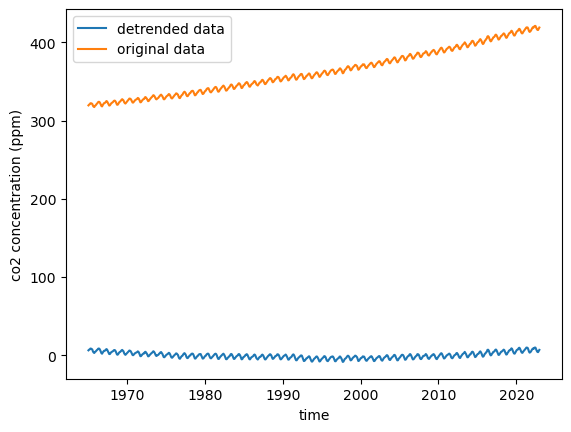

In [306]:
#collaborators: Zihao Li
##part 1

p = np.polyfit(time,co2Data, 1)
s = np.poly1d(p)(time)

co2detrend = co2Data - s

plt.plot(time,co2detrend, label = 'detrended data')
plt.plot(time,co2Data, label = 'original data')
plt.legend()
plt.xlabel('time')
plt.ylabel('co2 concentration (ppm)')

In [307]:
##part 2
co2filter = ratfilter(N,D,co2detrend)

co2 = co2filter + s

Text(0, 0.5, 'amplitude')

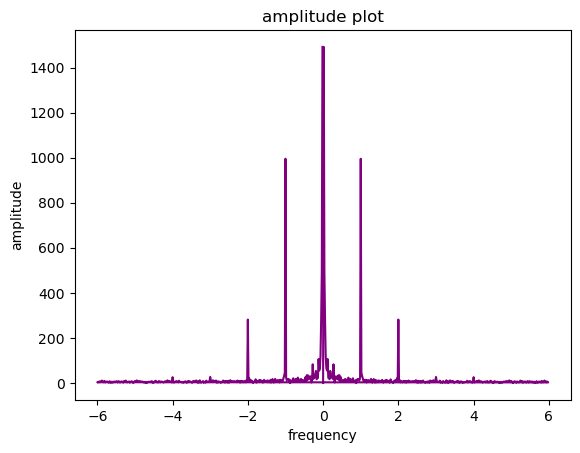

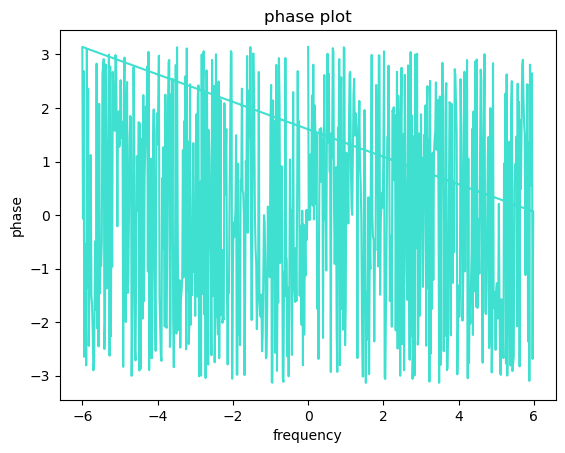

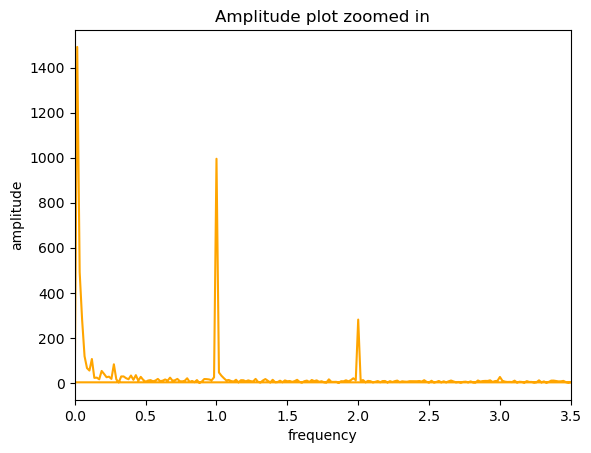

In [308]:
##part 3
dtc = time[1]-time[0]
co2fft = (np.fft.fft(co2detrend))
co2freq = (np.fft.fftfreq(len(co2fft)))

amp = np.abs(co2fft)
phase = np.angle(co2fft)

plt.figure()
plt.plot(co2freq/dtc, amp,'purple', label = 'amplitude')
plt.title('amplitude plot')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.figure()
plt.plot(co2freq/dtc,phase, 'turquoise')
plt.title('phase plot')
plt.xlabel('frequency')
plt.ylabel('phase')

plt.figure()
plt.plot(co2freq/dtc,amp, 'orange')
plt.xlim(0,3.5)
plt.title('Amplitude plot zoomed in')
plt.xlabel('frequency')
plt.ylabel('amplitude')

In [309]:
position =[]
for i in range(len(co2freq)):
    if np.abs(co2freq[i]) > 0.9/fs :
        position.append(i)
    
cfft = np.copy(co2fft)
for i in position:
    cfft[i]=0

co2ifft = np.fft.ifft(cfft)
co2trend = co2ifft + s


Text(0.5, 1.0, 'Filtering using the detrended co2 data')

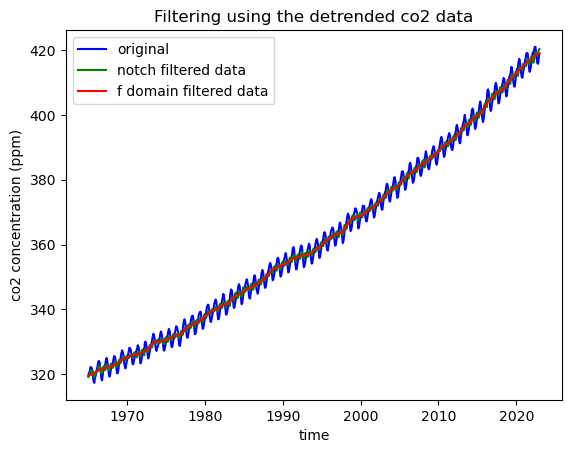

In [311]:
##part 4

plt.plot(time,co2Data, 'blue', label = 'original')
plt.plot(time,co2, 'green', label = 'notch filtered data')
plt.plot(time,co2trend, 'red', label = 'f domain filtered data')
plt.legend()
plt.xlabel('time')
plt.ylabel('co2 concentration (ppm)')
plt.title('Filtering using the detrended co2 data')

The notch filtered data seems to capture the original data somewhat well but it does not do a good job in filtering the noise. We see no fluctuations in the f domain data (red line in the centre), since its less noisy, we can say that its the better filter option to use as it still follows the same trend as the original. Not capturing any noise can also be a disadvantage. To use the notch filter function, we would need the values of a,b,c,B and C since they would be different in different scenarios.

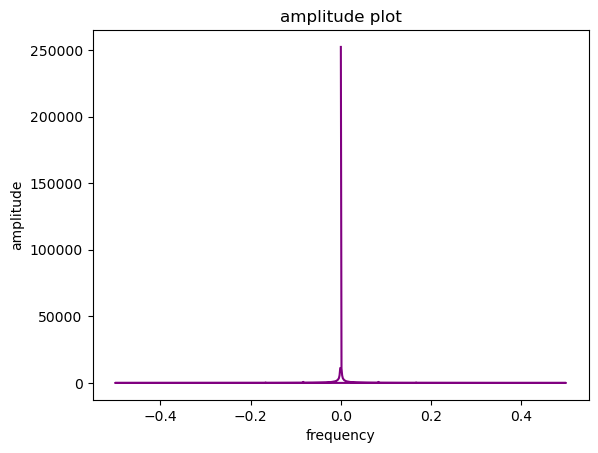

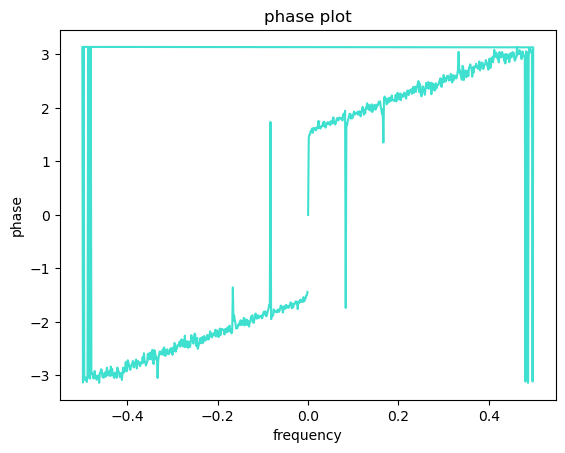

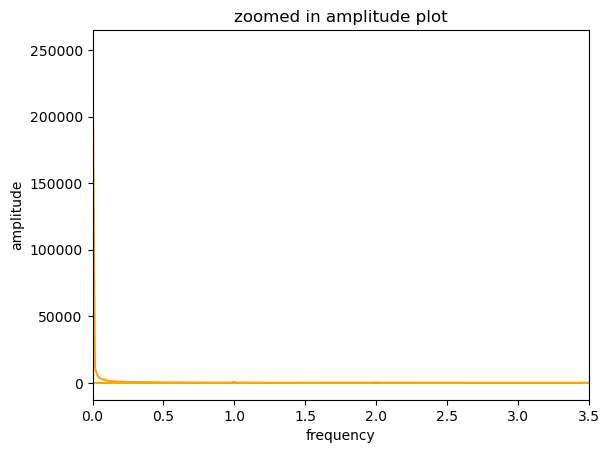

In [312]:
##part 5

#notch filter
c5notch = ratfilter(N,D,co2Data)

#fourier transform
c5fft = (np.fft.fft(co2Data))
c5freq = (np.fft.fftfreq(len(c5fft)))

amp5 = np.abs(c5fft)
phase5 = np.angle(c5fft)

plt.figure()
plt.plot(c5freq, amp5,'purple', label = 'amplitude')
plt.title('amplitude plot')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.figure()
plt.plot(c5freq,phase5, 'turquoise')
plt.title('phase plot')
plt.xlabel('frequency')
plt.ylabel('phase')

plt.figure()
plt.plot(c5freq/dtc,amp5, 'orange')
plt.xlim(0,3.5)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('zoomed in amplitude plot')

c5 = np.copy(c5fft)

for i in range(len(c5freq)):
    if np.abs(c5freq[i]) > 0.9 :
        c5[i]=0

#inverse fourier transform
c5ifft = np.abs(np.fft.ifft(c5))

Text(0.5, 1.0, 'Filtering using the Original Data')

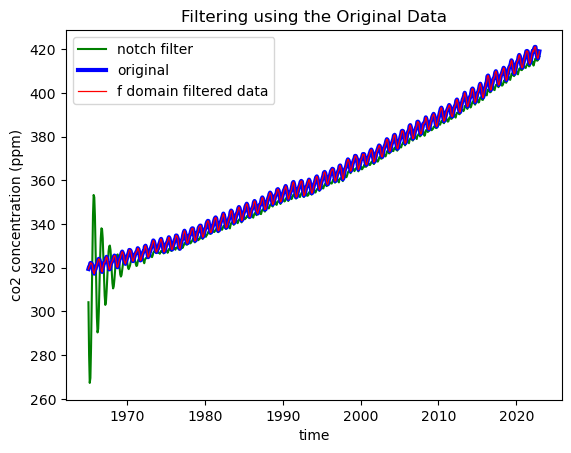

In [315]:
plt.plot(time, c5notch, 'green' ,label = 'notch filter')
plt.plot(time,co2Data, 'blue',lw = 3, label = 'original')
plt.plot(time, c5ifft, 'red', lw=0.9, label = 'f domain filtered data')
plt.legend()
plt.xlabel('time')
plt.ylabel('co2 concentration (ppm)')
plt.title('Filtering using the Original Data')

From the plot above, we can see that both the filters still follow the original data trend. The f domain filtering does a better job at capturing the original trend since we see the pink line aligning with the blue from the beginning. The notch filter starts off very noisy and not how the original co2 data begins. After a few years however, it starts to follow the trend just as the f domain filter does. Hence, we can conclude that detrending the data first is essential if we want accurate representations of co2 concentrations over the years. The f domain filtering remains better than the notch filter whether or not we detrend the data.